perform the following operations using Python on the Heart Diseases data set
a. Data cleaning
b. Data integration
c. Data transformation
d. Error correcting
e. Data model building


In [15]:
import pandas as pd


In [16]:


df = pd.read_csv(r"F:\codes\dsbda\Group B\PARTB-DATASETS\airquality_data.csv", encoding='latin-1')
df.head()


C:\Users\Acer\AppData\Local\Temp\ipykernel_15848\3049207929.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"F:\codes\dsbda\Group B\PARTB-DATASETS\airquality_data.csv", encoding='latin-1')


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


a. Data cleaning

In [17]:
# checkig for missing values
df.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [18]:
# removing missing values
print(df.shape)
df = df.dropna()
print(df.shape)

(435742, 13)
(0, 13)


In [19]:
# Check for duplicates
df.duplicated().sum()

0

In [20]:
# remove duplicate data
df = df.drop_duplicates()
df.duplicated().sum()

0

b. Data integration

Data integration in data science refers to the process of combining data from multiple sources or formats into a unified format that can be analyzed and processed together. 

In [21]:
df2 = pd.read_csv(r"F:\codes\dsbda\Group B\PARTB-DATASETS\heart.csv", sep = ',')
df2.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
df3 = pd.concat([df, df2])
df3

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,...,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,241.0,0.0,1.0,123.0,1.0,0.2,1.0,0.0,3.0,0.0
299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,264.0,0.0,1.0,132.0,0.0,1.2,1.0,0.0,3.0,0.0
300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,193.0,1.0,1.0,141.0,0.0,3.4,1.0,2.0,3.0,0.0
301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,131.0,0.0,1.0,115.0,1.0,1.2,1.0,1.0,3.0,0.0


In [23]:
# # Assuming you have two DataFrames df and df2
# df = pd.DataFrame({'ID': [1, 2, 3], 'Name': ['Alice', 'Bob', 'Charlie']})
# df2 = pd.DataFrame({'ID': [1, 2, 4], 'Age': [25, 30, 35]})

# # Data integration
# df_merged = pd.merge(df, df2, on='ID', how='inner')

# print(df_merged)

c. Data transformation

In data science, data transformation refers to the process of converting or modifying raw data into a suitable format that can be used for analysis, modeling, or visualization.

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

df2['chol'] = scaler.fit_transform(df2[['chol']])
df2

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,-0.256334,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,0.072199,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,-0.816773,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,-0.198357,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,2.082050,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,-0.101730,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,0.342756,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,-1.029353,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,-2.227533,0,1,115,1,1.2,1,1,3,0


In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
le = LabelEncoder()
x = le.fit_transform([['state']])
x.head()

c:\ProgramData\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AttributeError: 'numpy.ndarray' object has no attribute 'head'

d. Error correcting

In data science, error correction refers to the process of identifying and rectifying errors or inconsistencies in the data to ensure data quality and accuracy. 

In [28]:
import seaborn as sns

<Axes: >

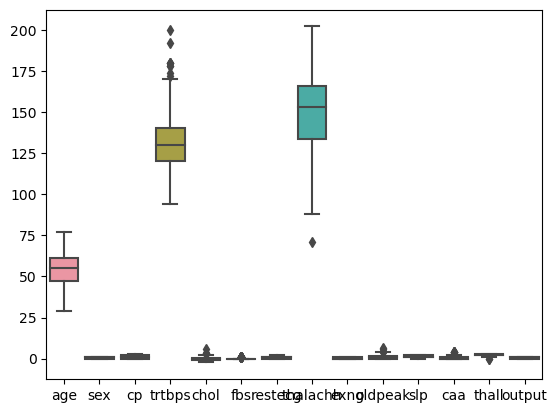

In [29]:
sns.boxplot(data=df2)

<Axes: >

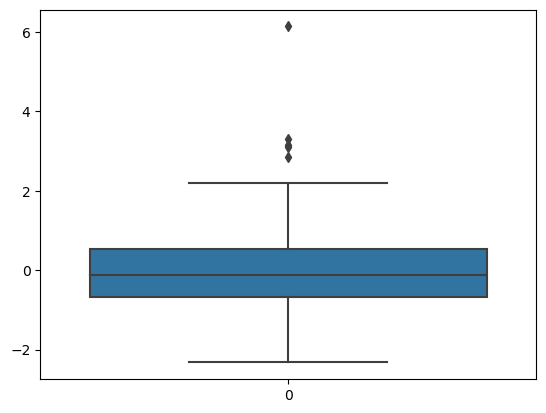

In [30]:
sns.boxplot(data=df2['chol'])

<Axes: >

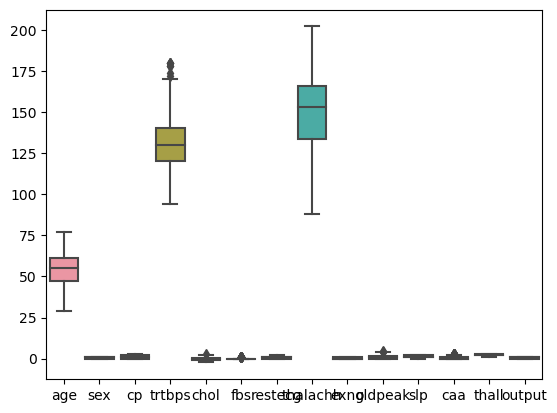

In [31]:
import numpy as np
from scipy import stats

z_score = np.abs(stats.zscore(df2))

threshold = 3 

filtered_data = df2[(z_score < threshold).all(axis = 1)]

sns.boxplot(data = filtered_data)

e. Data model building

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [33]:
x = df2.drop('output', axis=1)
y = df2[['output']]

x = pd.get_dummies(x)
y = pd.get_dummies(y)

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3)

In [35]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [ ]:
Y_train.shape

(717, 1)

In [36]:
from sklearn.metrics import accuracy_score
Y_predict = model.predict(X_test)
# accuracy = accuracy_score(X_test, Y_predict)
# accuracy